# <font color = "pink">Machine Learning</font>
<img height = 300 width = 600 src ="https://miro.medium.com/max/2400/1*c_fiB-YgbnMl6nntYGBMHQ.jpeg" >

In [66]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SC
import matplotlib.pyplot as plt
os.listdir()


['.git',
 '.ipynb_checkpoints',
 'Analysis Report.docx',
 'clean_data.csv',
 'Data Preprocessing and Visualizations.ipynb',
 'housetrain.csv',
 'housing.ipynb',
 'PCA and Machine Learning.ipynb']

In [67]:
data = pd.read_csv("clean_data.csv")
data.head()

,Unnamed: 0,RoofStyle,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,FullBath,Heating,Fireplaces,GarageArea,PoolArea,SaleCondition,Street,Neighborhood,SalePrice
0,0,Gable,2Story,5,2003,2003,2,GasA,0,548,0,Normal,Pave,CollgCr,208500
1,1,Gable,1Story,8,1976,1976,2,GasA,1,460,0,Normal,Pave,Veenker,181500
2,2,Gable,2Story,5,2001,2002,2,GasA,1,608,0,Normal,Pave,CollgCr,223500
3,3,Gable,2Story,5,1915,1970,1,GasA,1,642,0,Abnorml,Pave,Crawfor,140000
4,4,Gable,2Story,5,2000,2000,2,GasA,1,836,0,Normal,Pave,NoRidge,250000


# <font color = "darkorange"> Dummy Variables</font>

In [68]:
new = pd.DataFrame()# create a new dataframe
cats = data.columns[data.dtypes =="object"]
for i in cats:
    dummy  = pd.get_dummies(data[i])
    print(dummy.head(3))
    new = pd.concat((new,dummy),1)
    print(i)

   Flat  Gable  Gambrel  Hip  Mansard  Shed
0     0      1        0    0        0     0
1     0      1        0    0        0     0
2     0      1        0    0        0     0
RoofStyle
   1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       0       0       0       0       1       0     0
1       0       0       1       0       0       0       0     0
2       0       0       0       0       0       1       0     0
HouseStyle
   Floor  GasA  GasW  Grav  OthW  Wall
0      0     1     0     0     0     0
1      0     1     0     0     0     0
2      0     1     0     0     0     0
Heating
   Abnorml  AdjLand  Alloca  Family  Normal  Partial
0        0        0       0       0       1        0
1        0        0       0       0       1        0
2        0        0       0       0       1        0
SaleCondition
   Grvl  Pave
0     0     1
1     0     1
2     0     1
Street
   Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  \
0        0        

In [69]:
# remove the initial categorical features
data = data.drop(cats,1)
data.shape


(1460, 9)

In [70]:
# add the dummy variables

data = pd.concat((data,new),1)
print(data.shape)
data.head()

(1460, 62)


,Unnamed: 0,OverallCond,YearBuilt,YearRemodAdd,FullBath,Fireplaces,GarageArea,PoolArea,SalePrice,Flat,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,5,2003,2003,2,0,548,0,208500,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,1976,1976,2,1,460,0,181500,0,...,0,0,0,0,0,0,0,0,0,1
2,2,5,2001,2002,2,1,608,0,223500,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,1915,1970,1,1,642,0,140000,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,2000,2000,2,1,836,0,250000,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
#now our new data has 61 variables, we need to do a pca to reduce the features
x = data.drop("SalePrice",1)

sc = SC()
scaled_x = sc.fit_transform(x)
pca = PCA()
pca.fit_transform(scaled_x)

pca.explained_variance_ratio_

array([6.73091738e-02, 4.15948459e-02, 3.58641943e-02, 3.50337435e-02,
       3.34631709e-02, 2.99311068e-02, 2.60035006e-02, 2.35711987e-02,
       2.33877700e-02, 2.29238183e-02, 2.17495512e-02, 2.12890423e-02,
       2.03353508e-02, 1.99911240e-02, 1.96751928e-02, 1.93093193e-02,
       1.92936804e-02, 1.89494800e-02, 1.86717942e-02, 1.80276407e-02,
       1.78829455e-02, 1.78295741e-02, 1.73964447e-02, 1.71027727e-02,
       1.70214341e-02, 1.69342876e-02, 1.67059083e-02, 1.66067277e-02,
       1.65667279e-02, 1.64940875e-02, 1.63653698e-02, 1.60816614e-02,
       1.57858296e-02, 1.54706214e-02, 1.51392369e-02, 1.47470208e-02,
       1.45009216e-02, 1.42198847e-02, 1.40465668e-02, 1.37582873e-02,
       1.33536248e-02, 1.28431655e-02, 1.25840565e-02, 1.20042231e-02,
       1.19289554e-02, 1.17513124e-02, 1.08354423e-02, 1.02278232e-02,
       9.93278882e-03, 9.24513783e-03, 8.47051137e-03, 7.33931458e-03,
       6.33139518e-03, 4.38999827e-03, 1.73124219e-03, 1.32743939e-32,
      

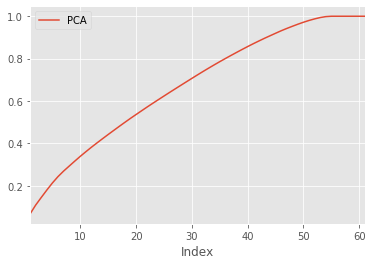

In [72]:
# We can plot the explained _variance ratio
df = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),columns = ["PCA"])
df["Index"] = [i+1 for i in range(len(df.PCA))]

plt.style.use("ggplot")
df.plot(kind = "line",x = "Index",y = "PCA")

plt.show()

# Conclusions
* We can use the elbow rule and select the number of components at the elbow, from the above graph, its clear the with just 20 components we have over  80% information and with just 30 components we have more than 98% of the information.
* We have reduced the number of variables from